<h1 style="font-size:50px;color:#696a6b"><strong>Importing </strong><strong style="color:black"> Libraries:</strong></h1>

In [47]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt
import numpy as np

<h1 style="font-size:50px;color:#696a6b"><strong>Importing </strong><strong style="color:black">CIFAR-10 Data:</strong></h1>

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

<h1 style="font-size:50px;color:#696a6b"><strong>Visualizing </strong><strong style="color:black">CIFAR-10 Data:</strong></h1>

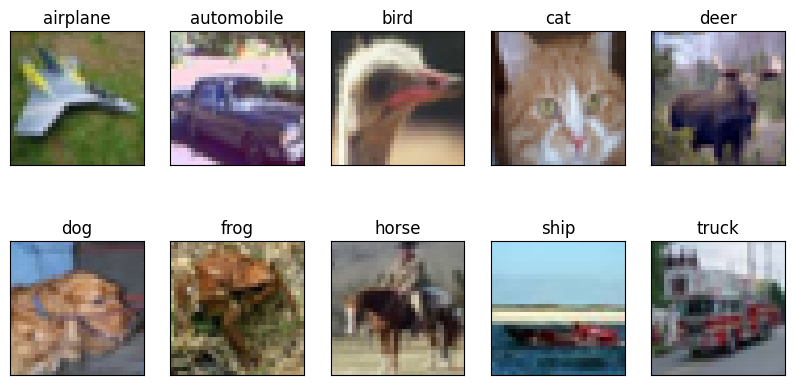

In [65]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_images[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

<h1 style="font-size:50px;color:#696a6b"><strong>Designing </strong><strong style="color:black">The CNN:</strong></h1>

In [ ]:
model = models.Sequential(
    [
        
        layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(64,(3,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Dropout(0.25),
     
        layers.Conv2D(128,(3,3),padding='same',activation='relu',input_shape=32),
        layers.BatchNormalization(),
        layers.Conv2D(128,(3,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Dropout(0.25),
     
        layers.Flatten(),
     
        layers.Dense(512 , activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10 , activation='softmax'),#all layers with relu as activation expect the last layer , with smallest unit=3
    ]
)

<h1 style="font-size:50px;color:#696a6b"><strong>Summary Of </strong><strong style="color:black">The CNN:</strong></h1>

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,461,642 (17.02 MB)

 Trainable params: 4,460,874 (17.02 MB)

 Non-trainable params: 768 (3.00 KB)

<h1 style="font-size:50px;color:#696a6b"><strong>Compiling & Training </strong><strong style="color:black">The Model:</strong></h1>

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [10]:
history = model.fit(
    train_images, train_labels,
    batch_size=32,
    epochs=50,
    validation_data=(test_images, test_labels),
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 336s 210ms/step - accuracy: 0.3501 - loss: 2.1979 - val_accuracy: 0.5813 - val_loss: 1.1886
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 272s 174ms/step - accuracy: 0.5706 - loss: 1.2315 - val_accuracy: 0.6087 - val_loss: 1.2212
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 278s 178ms/step - accuracy: 0.6438 - loss: 1.0323 - val_accuracy: 0.6541 - val_loss: 1.0198
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 238s 152ms/step - accuracy: 0.6843 - loss: 0.9188 - val_accuracy: 0.7371 - val_loss: 0.7645
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 264s 169ms/step - accuracy: 0.7204 - loss: 0.8213 - val_accuracy: 0.7441 - val_loss: 0.7728
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 243s 155ms/step - accuracy: 0.7509 - loss: 0.7348 - val_accuracy: 0.7595 - val_loss: 0.7334
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 233s 149ms/step - accuracy: 0.7722 - loss: 0.6656 - val_accuracy: 0.7854 - val_loss: 0.6783
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 240s 154ms/step - ac

<h1 style="font-size:50px;color:#696a6b"><strong>Save </strong><strong style="color:black">The Model:</strong></h1>

In [ ]:
model.save('cifar10_model.h5')

<h1 style="font-size:50px;color:#696a6b"><strong>Evaluating </strong><strong style="color:black">The Model:</strong></h1>

In [66]:
acc = history.history['accuracy'][-1]
print(f'\nModel accuracy: {acc}')



Model accuracy: 0.9617400169372559


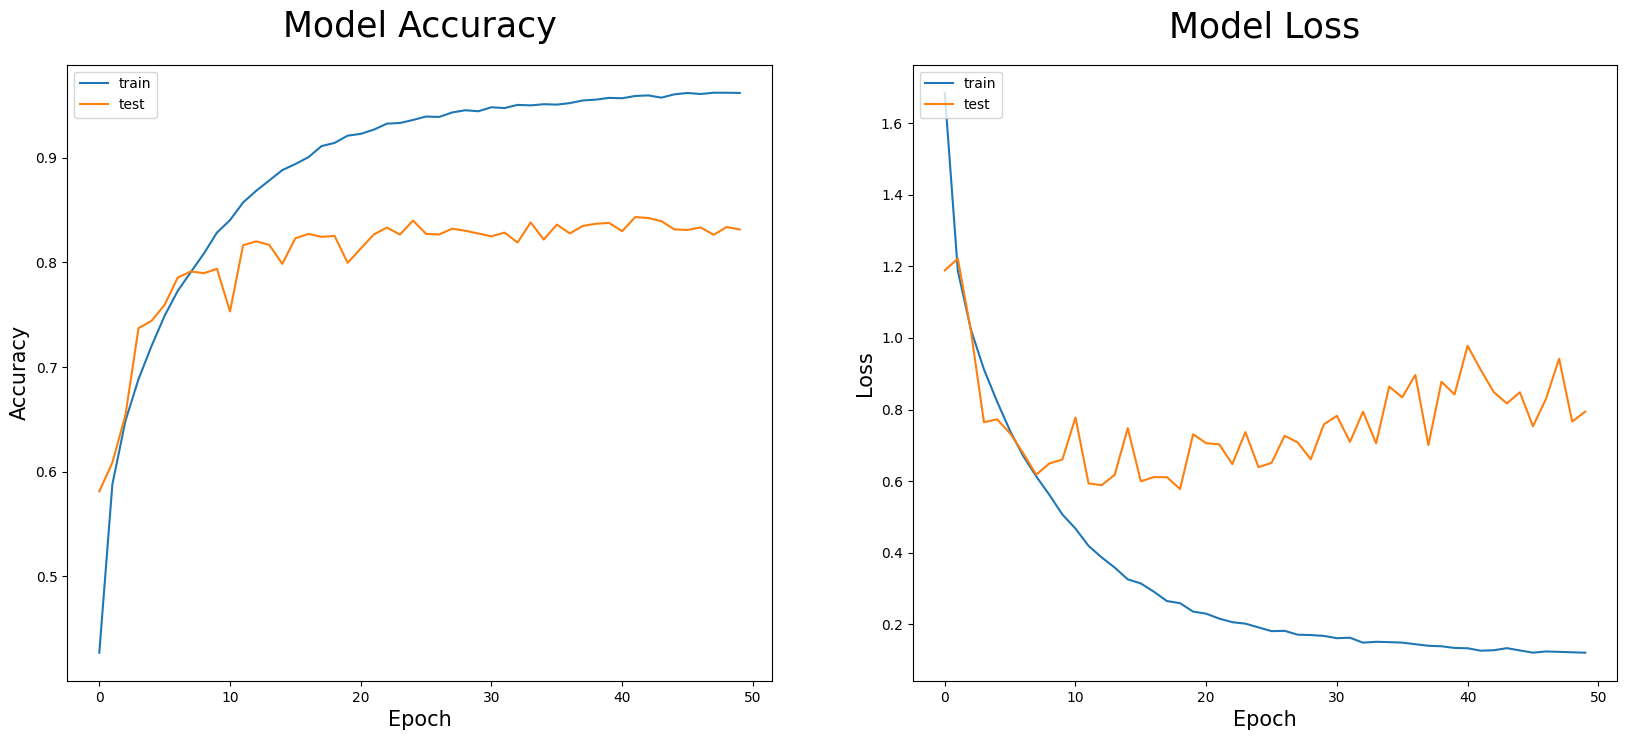

In [29]:

plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1 style="font-size:50px;color:#696a6b"><strong>Predictions </strong><strong style="color:black">Of The Model:</strong></h1>

In [ ]:
predictions = model.predict(test_images)

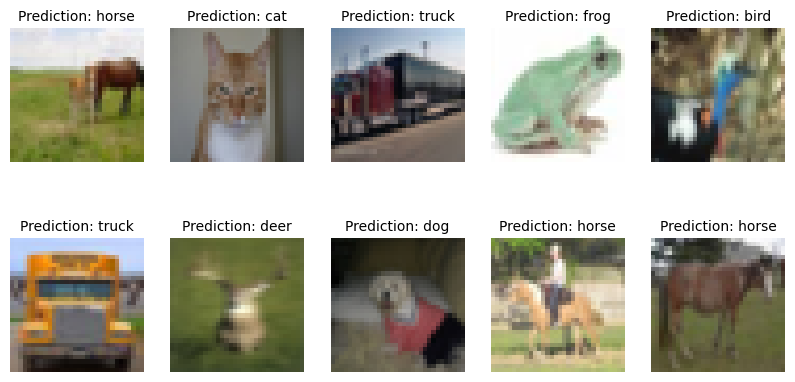

In [58]:
plt.figure(figsize=[10,5])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(10):
    plt.subplot(2,5,i+1)
    n = np.random.randint(1,10000)
    plt.imshow(test_images[n].reshape(32, 32, -1), cmap=plt.cm.binary)
    plt.title("Prediction: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=10)
    plt.grid(False)
    plt.axis('off')
plt.show()
